In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering

In [33]:
df = pd.read_csv('/Users/raffimannarelli/Downloads/wine.csv')
df.describe()
#if i wanted to count the null and 0 values in the dataset
one_hot = pd.get_dummies(df['color'])

# Drop 'color' column as we have encoded it, then concat it with the one hot encoding dataframe
df = df.drop('color', axis=1)
df = pd.concat([df, one_hot], axis=1)

# Dropping these varibles since these of course are what we are trying to determine based on the other variables
df_scaled = StandardScaler().fit_transform(df.drop(['red', 'white', 'quality'], axis=1))

df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


# PCA

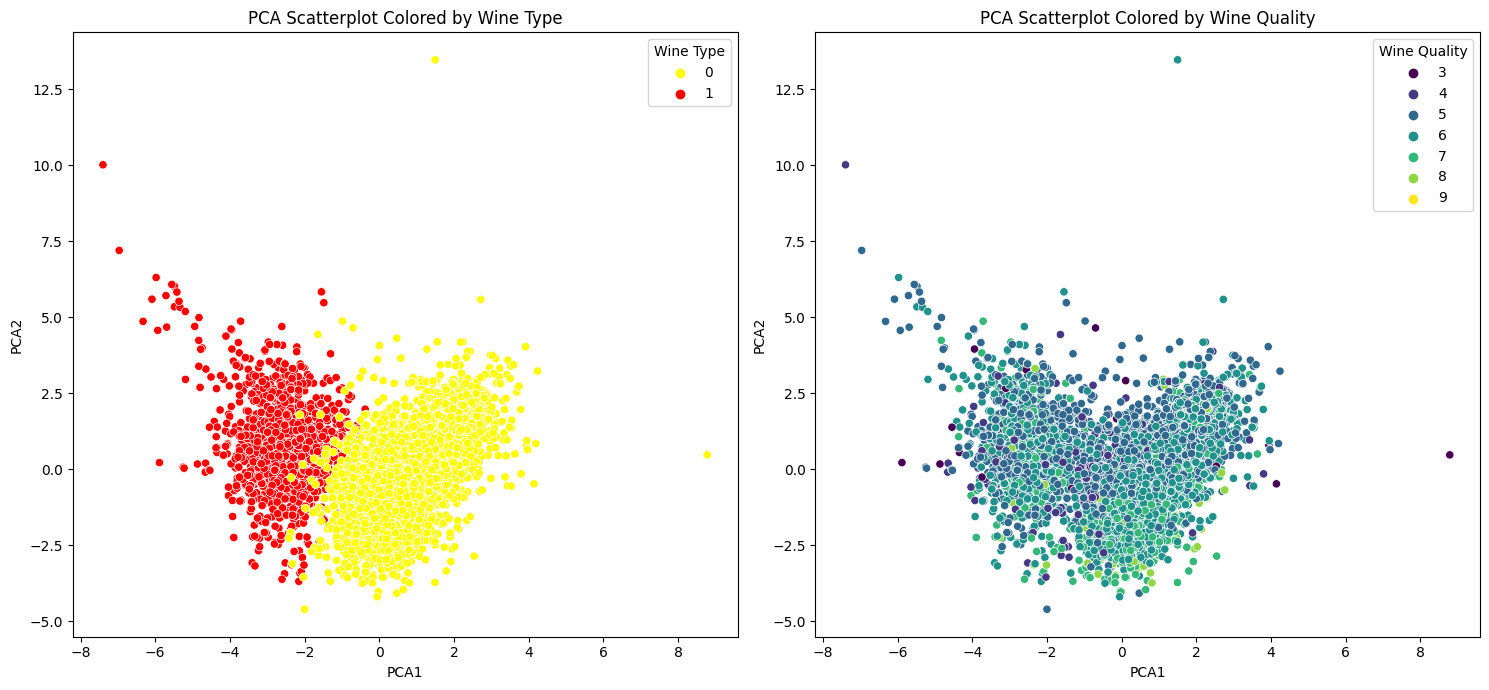

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(15, 7))

# Scatter plot for wine color
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(x='PCA1', y='PCA2', hue=df['red'], data=principalDf, palette={1: 'red', 0: 'yellow'})
plt.title("PCA Scatterplot Colored by Wine Type")
plt.legend(title='Wine Type', loc='upper right')

# Scatter plot for wine quality
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.scatterplot(x='PCA1', y='PCA2', hue=df['quality'], data=principalDf, palette='viridis', legend="full")
plt.title("PCA Scatterplot Colored by Wine Quality")
plt.legend(title='Wine Quality', loc='upper right')

plt.tight_layout()
plt.show()



# T-SNE

<Axes: xlabel='t-SNE1', ylabel='t-SNE2'>

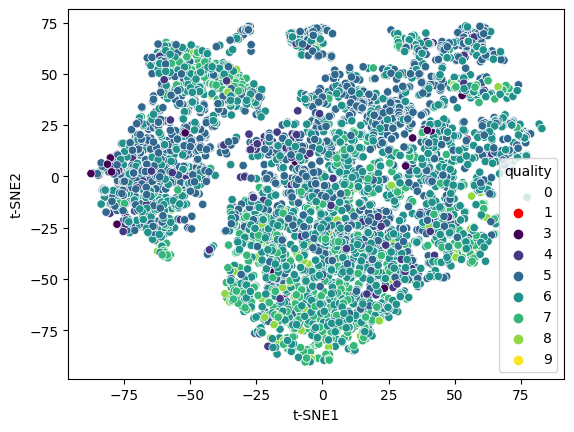

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
tsneResults = tsne.fit_transform(df_scaled)
tsneDf = pd.DataFrame(data=tsneResults, columns=['t-SNE1', 't-SNE2'])

# Plot t-SNE results with wine color
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df['red'], data=tsneDf, palette={1: 'red', 0: 'white'})

# Plot t-SNE results with wine quality
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=df['quality'], data=tsneDf, palette='viridis')


# K-Means + PCA/ T-Sne Dimension reduction

/Users/raffimannarelli/Desktop/PyPlay/langchain-experiments/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='PCA1', ylabel='PCA2'>

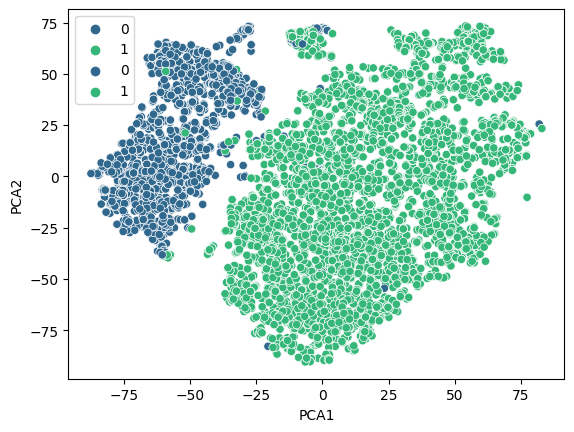

In [36]:
from sklearn.cluster import KMeans
from collections import Counter

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df_scaled)

# Plot clustered data with PCA
sns.scatterplot(x=principalDf['PCA1'], y=principalDf['PCA2'], hue=clusters, palette='viridis')

# Plot clustered data with t-SNE
sns.scatterplot(x=tsneDf['t-SNE1'], y=tsneDf['t-SNE2'], hue=clusters, palette='viridis')





In [37]:
# Adding cluster labels to original dataframe
df['Cluster'] = clusters  # Assuming 'clusters' contains the cluster labels

# Checking the mean quality for each cluster
cluster_quality = df.groupby('Cluster')['quality'].mean()
print(cluster_quality)
quality_distribution = df.groupby(['Cluster', 'quality']).size().unstack().fillna(0)
print(quality_distribution)


Cluster
0    5.601948
1    5.891636
Name: quality, dtype: float64
quality     3      4       5       6      7      8    9
Cluster                                                
0        12.0   74.0   702.0   640.0  198.0   17.0  0.0
1        18.0  142.0  1436.0  2196.0  881.0  176.0  5.0


In [38]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(principalDf, clusters)

# Add silhouette scores to the original dataframe
df['Silhouette'] = silhouette_values

# Calculate the average silhouette score for each wine quality
silhouette_by_quality = df.groupby('quality')['Silhouette'].mean()
print(silhouette_by_quality)


quality
3    0.402654
4    0.357565
5    0.456283
6    0.476402
7    0.466949
8    0.455941
9    0.397163
Name: Silhouette, dtype: float64


In [39]:
red_count = df['red'].sum()
white_count = len(df) - red_count

print(f"Number of red wines: {red_count}")
print(f"Number of white wines: {white_count}")




# Counting the number of occurrences for each cluster label
cluster_counts = Counter(clusters)

print(f"Number in Cluster 0: {cluster_counts[0]}")
print(f"Number in Cluster 1: {cluster_counts[1]}")


Number of red wines: 1599
Number of white wines: 4898
Number in Cluster 0: 1643
Number in Cluster 1: 4854


In [ ]:
quality_counts = df['quality'].value_counts()
print(quality_counts)


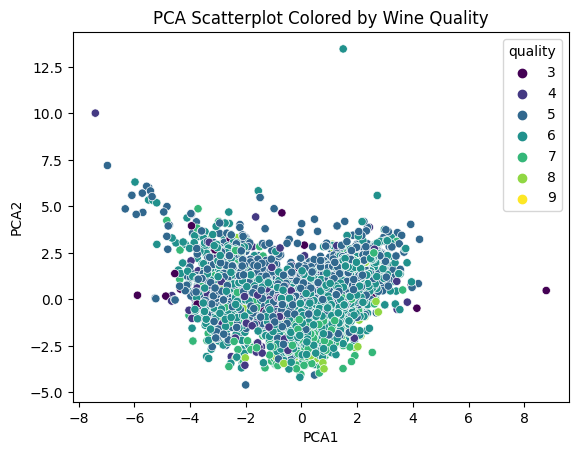

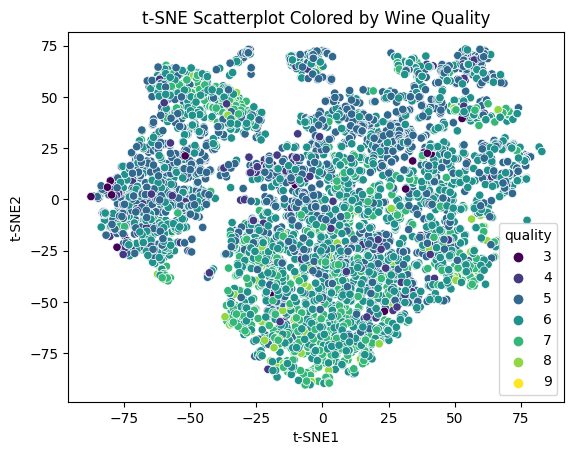

In [40]:
# PCA results colored by wine quality
sns.scatterplot(x='PCA1', y='PCA2', hue=df['quality'], data=principalDf, palette='viridis')
plt.title('PCA Scatterplot Colored by Wine Quality')
plt.show()

# If you have t-SNE results:
# t-SNE results colored by wine quality
sns.scatterplot(x=tsneDf['t-SNE1'], y=tsneDf['t-SNE2'], hue=df['quality'], data=tsneDf, palette='viridis')
plt.title('t-SNE Scatterplot Colored by Wine Quality')
plt.show()


# Analysis:

### Wine Type

**PCA**: Given that the wines' chemical properties may have a linear relationship (a wine with high sugar may always have a certain acidity level), PCA might capture these linear variances effectively.

**t-SNE**: While PCA distinguishes broadly different items, t-SNE preserves local similarities. It ensures wines with subtle chemical differences remain closely clustered, revealing distinctions that PCA might miss.

**Decision**: Combining PCA & t-SNE with KMeans clustering proved to be the best approach to try to create a prediction of wine by type. PCA and t-SNE simplified the data, and KMeans used this structured form to discern between red and white wines. The main variance components, highlighted by PCA, evidently match the red-white wine differentiation. Using both PCA and t-SNE ensured capturing the data's overarching structures and nuanced differences, making clustering more robust.

### Wine Quality:

The silhouette scores were leveraged to determine how well the wines of different qualities clustered together. Silhouette scores for wines of quality 6, 7, and 8 were notably higher, suggesting these wines have distinct chemical characteristics that set them apart from the rest. Wines rated 3,4 and  9 were less distinct  but this is due to the fact that out of 6500 wines less than 35 wines were rated a 3 or a 9.